# Parsing no2 files
* read csv file
* skip empty lines
* read in lines for DF
* add 'bundesland' and year as new columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [7]:
paths = glob.glob("*.csv")

In [8]:
#path = "DataScienceProjekt/Stickstoff/CSV/no2_2002.csv"

In [9]:
dfs = []

for file in paths:
    year = file.split("_")[-1].split(".")[0]
  
    data = []
    ofile = open(file, "r")
    start = False
    bundesland = None
    linec = 0
    for line in ofile:
        linec+=1
        if start == False:
            if line.lower().startswith("stat"):
                start = True
        else:    
            if line.startswith("@"):
                bundesland = line.split("@")[1]
                if bundesland == "": continue
            else:
                data.append((bundesland + "@" + year +"@"+line.replace("\n", "")).split("@")[:8])
                
    ofile.close()
    
    dfs.append(pd.DataFrame(data, columns= ["bundesland", "jahr", "station", "name", "umgebungstyp", "emissionstyp", "jahresmittel", "maxstundenwert"]))
    

In [5]:
#stickstoff = pd.DataFrame(data, columns= ["station", "name", "umgebungstyp", "emissionstyp", "jahresmittel", "maxstundenwert", ">290",">200","bundesland", "jahr"])

* nicht erfasste Daten als "---"
* "n*\\-1)"
* Stations teilweise mit '   '
* UBA

In [10]:
dfs[0]

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
0,Brandenburg,2002,'DEBB001',Burg (Spreewald),vorstädtisches Gebiet,Hintergrund,10,69
1,Brandenburg,2002,'DEBB006',Cottbus-Süd,städtisches Gebiet,Hintergrund,19,107
2,Brandenburg,2002,'DEBB009',Forst,vorstädtisches Gebiet,Hintergrund,16,83
3,Brandenburg,2002,'DEBB021',Potsdam-Zentrum,städtisches Gebiet,Hintergrund,21,111
4,Brandenburg,2002,'DEBB024',Senftenberg,städtisches Gebiet,Hintergrund,19,113
5,Brandenburg,2002,'DEBB026',Spremberg-Süd,vorstädtisches Gebiet,Industrie,14,98
6,Brandenburg,2002,'DEBB028',"Wittenberge, Packhofviertel",vorstädtisches Gebiet,Hintergrund,12,58
7,Brandenburg,2002,'DEBB029',Schwedt (Oder),vorstädtisches Gebiet,Industrie,15,102
8,Brandenburg,2002,'DEBB030',Premnitz,vorstädtisches Gebiet,Industrie,15,90
9,Brandenburg,2002,'DEBB031',Königs Wusterhausen,vorstädtisches Gebiet,Hintergrund,20,98


In [22]:
dfs[16][dfs[16]["maxstundenwert"].str.contains("-")]

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
1,Baden-Württemberg,2018,DEBW219,Backnang Eugen-Adolff-Straße,städtisches Gebiet,Verkehr,49,--- 1)
3,Baden-Württemberg,2018,DEBW213,Balingen Schömberger Straße,vorstädtisches Gebiet,Verkehr,31,--- 1)
7,Baden-Württemberg,2018,DEBW220,Esslingen Grabbrunnenstraße,städtisches Gebiet,Verkehr,45,--- 1)
11,Baden-Württemberg,2018,DEBW226,Friedrichshafen Maybachstraße,städtisches Gebiet,Verkehr,39,--- 1)
14,Baden-Württemberg,2018,DEBW151,Heidelberg Mittermaierstraße,städtisches Gebiet,Verkehr,38,--- 1)
15,Baden-Württemberg,2018,DEBW145,Heidenheim Wilhelmstraße,vorstädtisches Gebiet,Verkehr,39,--- 1)
18,Baden-Württemberg,2018,DEBW135,Herrenberg Hindenburger Straße,städtisches Gebiet,Verkehr,41,--- 1)
19,Baden-Württemberg,2018,DEBW133,Ilsfeld König-Wilhelm-Straße,vorstädtisches Gebiet,Verkehr,33,--- 1)
24,Baden-Württemberg,2018,DEBW223,Leinfelden-Echterdingen Hauptstraße,städtisches Gebiet,Verkehr,38,--- 1)
26,Baden-Württemberg,2018,DEBW227,Lichtenstein Wilhelmstraße,vorstädtisches Gebiet,Verkehr,34,--- 1)


In [20]:
len(dfs)

18

In [23]:
stickstoff = pd.concat(dfs)

In [24]:
stickstoff

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
0,Brandenburg,2002,'DEBB001',Burg (Spreewald),vorstädtisches Gebiet,Hintergrund,10,69
1,Brandenburg,2002,'DEBB006',Cottbus-Süd,städtisches Gebiet,Hintergrund,19,107
2,Brandenburg,2002,'DEBB009',Forst,vorstädtisches Gebiet,Hintergrund,16,83
3,Brandenburg,2002,'DEBB021',Potsdam-Zentrum,städtisches Gebiet,Hintergrund,21,111
4,Brandenburg,2002,'DEBB024',Senftenberg,städtisches Gebiet,Hintergrund,19,113
5,Brandenburg,2002,'DEBB026',Spremberg-Süd,vorstädtisches Gebiet,Industrie,14,98
6,Brandenburg,2002,'DEBB028',"Wittenberge, Packhofviertel",vorstädtisches Gebiet,Hintergrund,12,58
7,Brandenburg,2002,'DEBB029',Schwedt (Oder),vorstädtisches Gebiet,Industrie,15,102
8,Brandenburg,2002,'DEBB030',Premnitz,vorstädtisches Gebiet,Industrie,15,90
9,Brandenburg,2002,'DEBB031',Königs Wusterhausen,vorstädtisches Gebiet,Hintergrund,20,98


* remove empty space and nonsense number (e.g. 47 2)

In [38]:
def splitit(val):
    if " " in val:
        return val.split(" ")[0]
    else:
        return val
stickstoff["jahresmittel"] = stickstoff["jahresmittel"].apply(splitit)

In [35]:
stickstoff[stickstoff["jahresmittel"]=="-999"]

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
190,Hessen,2015,DEHE131,Limburg-Schiede,städtisches Gebiet,Verkehr,-999,23


* replace , with . for easy type casting

In [ ]:
stickstoff["jahresmittel"] = stickstoff["jahresmittel"].str.replace(",",".")

* cast column to float

In [41]:
stickstoff["jahresmittel"] = stickstoff["jahresmittel"].astype(float)

* drop row with extreme outlier -999

In [47]:
stickstoff.drop(190, axis=0, inplace = True)

* aggregate over years and plot mean jahresmittel values

In [48]:
mean = stickstoff.groupby("jahr").agg("mean")

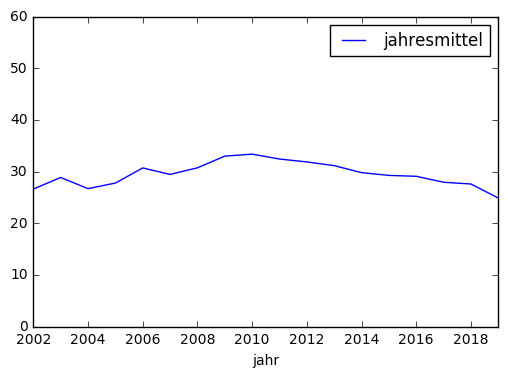

In [50]:
mean.plot(ylim=(0,60))

In [56]:
stickstoff["jahresmittel"].sort_values(ascending=False).unique()

array([121. , 112. , 109. , 106. , 104. , 100. ,  99. ,  98. ,  97. ,
        95. ,  93. ,  92. ,  91. ,  90. ,  89. ,  88. ,  87. ,  86. ,
        85. ,  84. ,  83. ,  82. ,  81. ,  80. ,  79. ,  78. ,  77. ,
        76. ,  75. ,  74. ,  73. ,  72. ,  71. ,  70. ,  69. ,  68. ,
        67. ,  66. ,  65. ,  64. ,  63. ,  62. ,  61. ,  60. ,  59. ,
        58. ,  57. ,  56. ,  55. ,  54. ,  53. ,  52. ,  51. ,  50. ,
        49. ,  48. ,  47. ,  46. ,  45. ,  44. ,  43. ,  42. ,  41. ,
        40. ,  39. ,  38. ,  37. ,  36. ,  35. ,  34. ,  33. ,  32. ,
        31. ,  30. ,  29. ,  28. ,  27. ,  26. ,  25. ,  24. ,  23. ,
        22. ,  21. ,  20. ,  19. ,  18. ,  17. ,  16. ,  15. ,  14. ,
        13. ,  12. ,  11. ,  10. ,   9.8,   9.5,   9. ,   8.9,   8.8,
         8.7,   8.6,   8.5,   8.4,   8.2,   8.1,   8. ,   7.8,   7.7,
         7.6,   7.5,   7.2,   7. ,   6.7,   6.6,   6.4,   6.3,   6. ,
         5.8,   5.7,   5.4,   5. ,   4.7,   4.6,   4.3,   4. ,   3. ,
         2. ,   1.8]

In [57]:
mean

,jahresmittel
jahr,
2002,26.596882
2003,28.840095
2004,26.687192
2005,27.761084
2006,30.687351
2007,29.432941
2008,30.712810
2009,32.972656
2010,33.358607


#### Check umgebungstyp variable

In [65]:
stickstoff["umgebungstyp"].unique()

array(['vorstädtisches Gebiet', 'städtisches Gebiet', 'ländlich regional',
       'ländlich stadtnah', 'ländlich Gebiet', 'ländlich Hintergrund',
       'ländlich abgelegen'], dtype=object)

In [64]:
stickstoff["umgebungstyp"] = stickstoff["umgebungstyp"].str.strip(" ").str.replace("reginal","regional").str.replace("ländliches","ländlich")

In [66]:
def group_up(val):
    if "länd" in val:
        return "ländlich"
    elif "vorst" in val:
        return "vorstädtisch"
    else:
        return "städtisch"

In [67]:
stickstoff["umgebungstyp_grob"] = stickstoff["umgebungstyp"].apply(group_up)

In [68]:
stickstoff["umgebungstyp_grob"].unique()

array(['vorstädtisch', 'städtisch', 'ländlich'], dtype=object)

In [69]:
mean = stickstoff.groupby(["jahr", "umgebungstyp_grob"]).agg("mean")

In [72]:
mean_st = stickstoff[stickstoff["umgebungstyp_grob"] == "städtisch"].groupby("jahr").agg("mean")

In [74]:
mean_vs = stickstoff[stickstoff["umgebungstyp_grob"] == "vorstädtisch"].groupby("jahr").agg("mean")

In [75]:
mean_la = stickstoff[stickstoff["umgebungstyp_grob"] == "ländlich"].groupby("jahr").agg("mean")

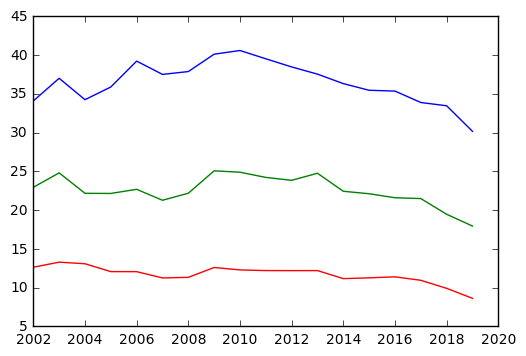

In [78]:
plt.plot(mean_st)
plt.plot(mean_vs)
plt.plot(mean_la)

In [79]:
stickstoff["bundesland"].unique()

array(['Brandenburg', 'Berlin', 'Baden-Württemberg', 'Bayern', 'Bremen',
       'Hessen', 'Hamburg', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrrhein-Westfalen', 'Rheinland-Pfalz', 'Schleswig-Holstein',
       'Saarland', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen', 'UBA',
       'Nordrhein-Westfalen', 'Umweltbundesamt'], dtype=object)